In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy.signal as ss
import seaborn as sns
import numpy as np
from skimage.io import imread
from glob import glob
import os
import h5py
import matplotlib.colors

### Load data as dataframe

#### Read .pkl files for both single and combo mutants

In [2]:
sumPath = '/Users/zhengj10/Desktop/iGluSnFR'
df_winner = pd.read_excel(sumPath+'/iGluSnFR4_winners.xlsx')
df_winner.construct.unique().shape

(69,)

In [3]:
# df_combo_1AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_combo_1AP.pkl')
# df_combo_1AP.construct.unique().shape

In [4]:
sumPath = '/Users/zhengj10/Desktop/iGluSnFR'

df_single_20AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_single_20AP.pkl')
df_combo_20AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_combo_20AP.pkl')

df_winner = pd.read_excel(sumPath+'/iGluSnFR4_winners.xlsx')

df_single_1AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_single_1AP.pkl')
df_single_1AP = df_single_1AP[df_single_1AP['no_pixels']>1e4]
df_single_1AP = df_single_1AP[(df_single_1AP['fast_dF'].notna())&(df_single_1AP['dFF'].notna())]

construct_id = []
fast_dF = []
dFF_1AP = []
dFF_20AP = []
tau_off = []
ctr_fast_dF = []
color = []
count = []

winner = []
mutation = []

for c in df_single_1AP.construct_id.unique():
    df_1AP_t = df_single_1AP[df_single_1AP['construct_id']==c]
    df_20AP_t = df_single_20AP[df_single_20AP['construct_id']==c]
    construct_id.append(c)
    fast_dF.append(df_1AP_t.fast_dF.median())
    dFF_1AP.append(df_1AP_t.dFF.median())
    dFF_20AP.append(df_20AP_t.dFF.median())
    tau_off.append(df_1AP_t.tau_off.median())
    ctr_fast_dF.append(df_1AP_t.ctr_fast_dF.median())
    if df_1AP_t.construct_id_dot.unique()[0] in df_winner['construct'].unique():
        color.append('r')
        count.append(c)
    else:
        color.append('gray')
    
df_single = pd.DataFrame()
df_single['construct_id'] = construct_id
df_single['fast_dF'] = fast_dF
df_single['dFF_1AP'] = dFF_1AP
df_single['dFF_20AP'] = dFF_20AP
df_single['tau_off'] = tau_off
df_single['ctr_fast_dF'] = ctr_fast_dF
df_single['color'] = color

df_single = df_single.sort_values(by='fast_dF',ascending=True)

df_combo_1AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_combo_1AP.pkl')
df_combo_1AP = df_combo_1AP[df_combo_1AP['no_pixels']>1e4]
df_combo_1AP = df_combo_1AP[(df_combo_1AP['fast_dF'].notna())&(df_combo_1AP['dFF'].notna())]

construct_id = []
fast_dF = []
dFF_1AP = []
dFF_20AP = []
tau_off = []
ctr_fast_dF = []
color = []
for c in df_combo_1AP.construct_id.unique():
    df_1AP_t = df_combo_1AP[df_combo_1AP['construct_id']==c]
    df_20AP_t = df_combo_20AP[df_combo_20AP['construct_id']==c]
    construct_id.append(c)
    fast_dF.append(df_1AP_t.fast_dF.median())
    dFF_1AP.append(df_1AP_t.dFF.median())
    dFF_20AP.append(df_20AP_t.dFF.median())
    tau_off.append(df_1AP_t.tau_off.median())
    ctr_fast_dF.append(df_1AP_t.ctr_fast_dF.median())
    if df_1AP_t.construct_id_dot.unique()[0] in df_winner['construct'].unique():
        color.append('r')
        count.append(c)
    else:
        color.append('gray')
    
df_combo= pd.DataFrame()
df_combo['construct_id'] = construct_id
df_combo['fast_dF'] = fast_dF
df_combo['dFF_1AP'] = dFF_1AP
df_combo['dFF_20AP'] = dFF_20AP
df_combo['tau_off'] = tau_off
df_combo['ctr_fast_dF'] = ctr_fast_dF
df_combo['color'] = color

df_combo = df_combo.sort_values(by='fast_dF',ascending=True)

In [5]:
df_single[df_single['construct_id']=='633.880']
df_combo[df_combo['construct_id']=='633.9147']

,construct_id,fast_dF,dFF_1AP,dFF_20AP,tau_off,ctr_fast_dF,color
698,633.9147,1.553267,1.570733,1.849213,1.720934,9.39412,r


In [6]:
# for i,r in df_single_1AP.iterrows():
#     print(r['construct'].split('.')[0].split(' ')[-1])
#     if i >20:
#         break
# df_single_1AP.shape

In [7]:
C = []
M = []
for i,r in df_winner.iterrows():
#     print(r['construct'])
    df_t = df_single_1AP[df_single_1AP['construct_id_dot']==r['construct']]
    if len(df_t)==0:
        continue
    c = df_t['construct_id_dot'].unique()[0]
    C.append(c.replace('dot','.'))
    M.append(df_t.construct.unique()[0].split('.')[0].split(' ')[-1])

In [8]:
df_ws = pd.DataFrame()
df_ws['Winner'] = C
df_ws['Mutation'] = M

In [10]:
# df_ws.to_excel('/Users/zhengj10/Desktop/winner_single.xlsx')

In [11]:
C = []
M = []
for i,r in df_winner.iterrows():
#     print(r['construct'])
    df_t = df_combo_1AP[df_combo_1AP['construct_id_dot']==r['construct']]
    if len(df_t)==0:
        continue
    c = df_t['construct_id_dot'].unique()[0]
    C.append(c.replace('dot','.'))
    M.append(df_t.construct.unique()[0].split('.')[0][32:])

In [12]:
df_wc = pd.DataFrame()
df_wc['Winner'] = C
df_wc['Mutation'] = M

In [14]:
# df_wc.to_excel('/Users/zhengj10/Desktop/230214/winner_combo.xlsx')

In [15]:
df_wc

,Winner,Mutation
0,633.7895,Y31Q Q98F N499V
1,633.8110,Y31Q Q98F K271G Q418S N499L
2,633.8179,Y31E Q34A Q98F N499V
3,633.8254,Y31E Q98F T254R Q418S
4,633.8357,Y31Q Q34A K271G Q418S N499L
5,633.8360,Y31Q Q34A Q98F K271G Q418S N499L
6,633.8366,Q34A Q98F N499L
7,633.8376,Y31E Q34A Q98F K271G N499L
8,633.8439,T254R K271G Q418S N499L
9,633.8440,T254R Q418S N499L


In [16]:
df_all = pd.concat([df_single,df_combo],axis=0)
df_all.shape
df_all.columns
df_combo.shape
df_all.shape

(3046, 7)

#### Plot

/var/folders/87/trl8ql4s7vj6fkdtrrkcwx6s0zb2d2/T/ipykernel_26965/1185696401.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=-0.2)


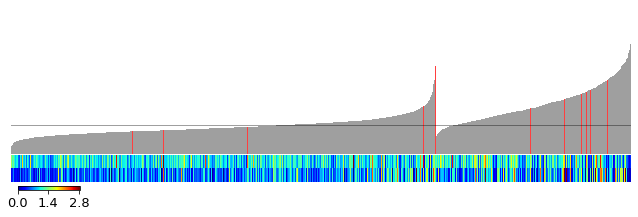

In [17]:
import matplotlib as mpl
plt.rc('font',size=13)
x = np.arange(df_all.shape[0])
f,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,gridspec_kw={'height_ratios':[5,0.5,0.5,0.5]},figsize=(9,3))

bar = ax1.bar(x,df_all['fast_dF'],width=1,color=df_all['color'],alpha=0.75)
ax1.hlines(1,-10,df_all.shape[0]+10,color='k',alpha=0.5,lw=0.75)
ax1.axis('off')
ax1.set_ylim([-0.1,5])
ax1.set_xlim([-1,3027])
ax1.set_xlabel('construct_no',size=14,color='w')

my_cmap = plt.get_cmap("jet")
rescale = lambda y:(y-0.0073139104656749)/(5.654111015686038*0.5)

ax2.bar(x,1,width=1,color=my_cmap(rescale(df_all['dFF_1AP'])))
ax2.axis('off')
ax2.set_xlim([-1,3027])

ax3.bar(x,1,width=1,color=my_cmap(rescale(df_all['dFF_20AP'])))
ax3.axis('off')
ax3.set_xlim([-1,3027])


ax4.axis('off')
N = len(df_all)
cmap = plt.get_cmap('jet', N)
norm = mpl.colors.Normalize(vmin=0, vmax=5.654111015686038*0.5)
  
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(ax4, width="10%", height="25%", loc='upper left')

cbar = plt.colorbar(sm,cax=axins, ticks=np.linspace(0,2.8,3),orientation='horizontal')
# cbar.ax.set_ylabel('Norm. dFF',size=14,rotation=0)

plt.tight_layout(h_pad=-0.2)
# plt.savefig('/Users/zhengj10/Desktop/230207/screening_progress.pdf',format='pdf')
# plt.savefig('/Users/zhengj10/Desktop/230214/screening_progress.svg',format='svg')
plt.show()

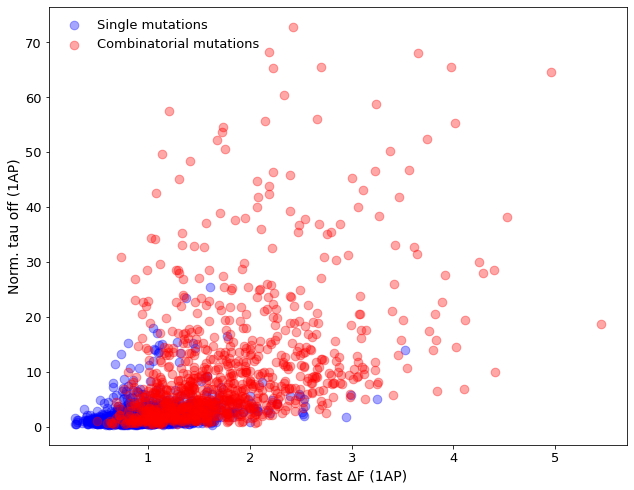

In [18]:
plt.figure(figsize=(9,7))
plt.rc('font',size=13)
ax = plt.subplot(111)
single = ax.scatter(df_single['fast_dF'],df_single['tau_off'],c='blue',alpha=0.35,s=75,label='Single mutations')
combo = ax.scatter(df_combo['fast_dF'],df_combo['tau_off'],c='red',alpha=0.35,s=75,
                  label='Combinatorial mutations')
ax.set_xlabel('Norm. fast \u0394F (1AP)',size=14)
# ax.set_ylabel('Norm. \u03C4 off (1AP)',size=14)
ax.set_ylabel('Norm. tau off (1AP)',size=14)
leg = plt.legend(loc='upper left',frameon=False)
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/230207/scatter.pdf',format='pdf')
# plt.savefig('/Users/zhengj10/Desktop/230214/scatter.svg',format='svg')
plt.show()

#### Merge 1AP and 20 AP such that each 1AP data has corresponding 20AP data

In [19]:
df_c_1 = pd.DataFrame()
df_c_20 = pd.DataFrame()
for c in df_combo_1AP.construct.unique():
    df_t_1 = df_combo_1AP[df_combo_1AP['construct']==c]
    df_t_20 = df_combo_20AP[df_combo_20AP['construct']==c]
    df_c_1 = pd.concat([df_c_1,df_t_1],axis=0)
    df_c_20 = pd.concat([df_c_20,df_t_20],axis=0)
    
df_s_1 = pd.DataFrame()
df_s_20 = pd.DataFrame()
for c in df_single_1AP.construct.unique():
    df_t_1 = df_single_1AP[df_single_1AP['construct']==c]
    df_t_20 = df_single_20AP[df_single_20AP['construct']==c]
    df_s_1 = pd.concat([df_s_1,df_t_1],axis=0)
    df_s_20 = pd.concat([df_s_20,df_t_20],axis=0)

In [20]:
df_combo = pd.concat([df_c_1,df_c_20],axis=1)
df_single = pd.concat([df_s_1,df_s_20],axis=1)

#### Rename columns to distuiguish 1AP and 20AP data

In [23]:
# df_combo.columns = ['date/plate', 'construct', 'no_pixels', 'thre', 'ctr_no_pixels', 'SNR',
#        'dFF', 'fast_dF', 'fast_dFF', 'F0', 'tau_on', 'tau_off',
#        'dFF_Tau_on_ratio', 'SNR_unnorm', 'dFF_unnorm', 'fast_dFF_unnorm',
#        'F0_unnorm', 'tau_on_unnorm', 'tau_off_unnorm', 'ctr_SNR', 'ctr_dFF',
#        'ctr_fast_dF', 'ctr_fast_dFF', 'ctr_F0', 'ctr_tau_on', 'ctr_tau_off',
#        'ctr_dFF_Tau_on_ratio', 'construct_id', 'date/plate_20AP', 'construct_20AP',
#        'no_pixels_20AP', 'thre', 'ctr_no_pixels', 'SNR', 'dFF_20AP', 'fast_dF_20AP',
#        'fast_dFF', 'F0_20AP', 'tau_on', 'tau_off', 'dFF_Tau_on_ratio', 'SNR_unnorm',
#        'dFF_unnorm', 'fast_dFF_unnorm', 'F0_unnorm', 'tau_on_unnorm',
#        'tau_off_unnorm', 'ctr_SNR', 'ctr_dFF', 'ctr_fast_dF', 'ctr_fast_dFF',
#        'ctr_F0', 'ctr_tau_on', 'ctr_tau_off', 'ctr_dFF_Tau_on_ratio',
#        'construct_id_20AP']

# df_single.columns = ['date/plate', 'construct', 'no_pixels', 'thre', 'ctr_no_pixels', 'SNR',
#        'dFF', 'fast_dF', 'fast_dFF', 'F0', 'tau_on', 'tau_off',
#        'dFF_Tau_on_ratio', 'SNR_unnorm', 'dFF_unnorm', 'fast_dFF_unnorm',
#        'F0_unnorm', 'tau_on_unnorm', 'tau_off_unnorm', 'ctr_SNR', 'ctr_dFF',
#        'ctr_fast_dF', 'ctr_fast_dFF', 'ctr_F0', 'ctr_tau_on', 'ctr_tau_off',
#        'ctr_dFF_Tau_on_ratio', 'construct_id', 'date/plate_20AP', 'construct_20AP',
#        'no_pixels_20AP', 'thre', 'ctr_no_pixels', 'SNR', 'dFF_20AP', 'fast_dF_20AP',
#        'fast_dFF', 'F0_20AP', 'tau_on', 'tau_off', 'dFF_Tau_on_ratio', 'SNR_unnorm',
#        'dFF_unnorm', 'fast_dFF_unnorm', 'F0_unnorm', 'tau_on_unnorm',
#        'tau_off_unnorm', 'ctr_SNR', 'ctr_dFF', 'ctr_fast_dF', 'ctr_fast_dFF',
#        'ctr_F0', 'ctr_tau_on', 'ctr_tau_off', 'ctr_dFF_Tau_on_ratio',
#        'construct_id_20AP']

#### Confirm each row is the 1AP and 20AP data from same construct & well

In [25]:
# for i,r in df_combo.iterrows():
#     if r['construct']!=r['construct_20AP']:
#         print(i,r['construct'],r['construct_20AP'])
# for i,r in df_single.iterrows():
#     if r['construct']!=r['construct_20AP']:
#         print(i,r['construct'],r['construct_20AP'])

In [26]:
param = 'dFF'
# param = 'fast_dF'
# param = 'fast_dFF'
# param = 'dFF_tau_on_ratio'
# param = 'tau_on'

In [27]:
df_combo.shape

(1473, 54)

#### Exclude NA values from plotted parameters only (instead of using df.dropna())

In [29]:
# df_combo = df_combo[df_combo['no_pixels']>1e4]
# df_combo = df_combo[(df_combo['fast_dF'].notna())&(df_combo['dFF_20AP'].notna())&(df_combo['F0'].notna())]
# df_combo = df_combo.sort_values(by=param,ascending=False)

# df_single = df_single[df_single['no_pixels']>1e4]
# df_single = df_single[(df_single['fast_dF'].notna())&(df_single['dFF_20AP'].notna())&(df_single['F0'].notna())]
# df_single = df_single.sort_values(by=param,ascending=False)

In [ ]:
# df_single[df_single['construct'].str.contains('6428')]
# df_combo[df_combo['construct'].str.contains('9139')]
# df_combo.loc[10251,'construct']

#### Kerr plot (fast dF_1AP vs. dFF_20AP)

In [ ]:
sns.set_style(style='whitegrid')
fig = plt.figure(figsize=(13,7.5))
plt.rc('font', size=13)
ax = plt.subplot(111)

scale = 20 # for combo mutants
all_sensors = plt.scatter(df_combo[param],df_combo['dFF_20AP'],c=df_combo['no_pixels'],s=df_combo['F0']*scale,
                          cmap="jet")

all_sensors = plt.scatter(df_single[param],df_single['dFF_20AP'],c=df_single['no_pixels'],s=df_single['F0']*scale,
                          marker='x',cmap="jet")
plt.clim(a,b)
cbar = plt.colorbar(all_sensors,aspect=50)
cbar.ax.set_ylabel('No. pixels',rotation=90,size=14)

plt.legend(*all_sensors.legend_elements("sizes", num = 5,func = lambda x: x/scale),title='Norm. F0')
ax.set_xlabel('Norm. fast \u0394F (1AP)',size=14)
ax.set_ylabel('Norm. \u0394F/F0 (20AP)',size=14)


plt.tight_layout()
savePath = '/Volumes/genie/Presentations/Jihong/GENIE production/230117/iGluSnFR_screening'
if not os.path.exists(savePath):
    os.makedirs(savePath)
# plt.savefig(savePath+'/Kerr_all_%s.svg', %paramformat='svg')
# plt.savefig('/Users/zhengj10/Desktop/20AP.pdf',format='pdf')
plt.show()

In [ ]:
a = np.quantile(df_single['no_pixels'],0.1)
b = np.quantile(df_combo['no_pixels'],0.9)
ax.get_xlim()

#### Kerr plot zoomed for top hits (fast dF_1AP vs. dFF_20AP)

In [ ]:
sns.set_style(style='whitegrid')
fig = plt.figure(figsize=(13,7.5))
plt.rc('font', size=13)
ax = plt.subplot(111)

scale = 20 # for combo mutants
df_combo = df_combo[df_combo['fast_dF']<6]
all_sensors = plt.scatter(df_combo[param],df_combo['dFF_20AP'],c=df_combo['no_pixels'],s=df_combo['F0']*scale,
                          cmap="jet")

all_sensors = plt.scatter(df_single[param],df_single['dFF_20AP'],c=df_single['no_pixels'],s=df_single['F0']*scale,
                          marker='x',cmap="jet")

plt.clim(a,b)
cbar = plt.colorbar(all_sensors,aspect=50)
cbar.ax.set_ylabel('No. pixels',rotation=90,size=14)
plt.legend(*all_sensors.legend_elements("sizes", num = 5,func = lambda x: x/scale),title='Norm. F0')

ax.set_xlabel('Norm. fast \u0394F (1AP)',size=14)
ax.set_ylabel('Norm. \u0394F/F0 (20AP)',size=14)

ax.set_xlim([2.9, 6])

construct_l = df_combo.construct.to_list()
dFF_l = df_combo['dFF_20AP'].to_list()
fast_dF_l = df_combo.fast_dF.to_list()

top_hits_full = []
top_hits = []

text_height = (ax.get_ylim()[0]+ax.get_ylim()[1])/40
for i,construct in enumerate(construct_l):
    
    
    if fast_dF_l[i]>3:
        if ';' in construct:
            if construct.split(';')[0][-5]=='.':
                ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-8:], ha="center",size=12)
                top_hits.append(construct.split(';')[0][-8:])
                top_hits_full.append(construct)
            else:
                ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-7:], ha="center",size=12)
                top_hits.append(construct.split(';')[0][-7:])
                top_hits_full.append(construct)

        elif construct[-5]=='.':
            ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct[-8:], ha="center",size=12)
            top_hits.append(construct[-8:])
            top_hits_full.append(construct)

        else:
            ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct[-7:], ha="center",size=12)
            top_hits.append(construct[-7:])
            top_hits_full.append(construct)
            
construct_l = df_single.construct.to_list()
dFF_l = df_single['dFF_20AP'].to_list()
fast_dF_l = df_single.fast_dF.to_list()

top_hits_full = []
top_hits = []

text_height = (ax.get_ylim()[0]+ax.get_ylim()[1])/40
for i,construct in enumerate(construct_l):
    if '9187' in construct_l[i]:
        ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-7:], ha="center",size=15,color='r')
        print('haha')
    if fast_dF_l[i]>3 and fast_dF_l[i]<6:
        if ';' in construct:
            if construct.split(';')[0][-5]=='.':
                ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-8:], ha="center",size=12)
                top_hits.append(construct.split(';')[0][-8:])
                top_hits_full.append(construct)
            else:
                ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-7:], ha="center",size=12)
                top_hits.append(construct.split(';')[0][-7:])
                top_hits_full.append(construct)

        elif construct[-5]=='.':
            ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct[-8:], ha="center",size=12)
            top_hits.append(construct[-8:])
            top_hits_full.append(construct)

        else:
            ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct[-7:], ha="center",size=12)
            top_hits.append(construct[-7:])
            top_hits_full.append(construct)

plt.tight_layout()
savePath = '/Volumes/genie/Presentations/Jihong/GENIE production/230117/iGluSnFR_screening'
if not os.path.exists(savePath):
    os.makedirs(savePath)
# plt.savefig(savePath+'/Kerr_all_zoom.svg',format='svg')
# plt.savefig('/Users/zhengj10/Desktop/20AP.pdf',format='pdf')
plt.show()


In [ ]:
top_hits

In [ ]:
# df_single.to_excel(sumPath+'/single_1AP.xlsx')
# df_combo.to_excel(sumPath+'/combo_1AP.xlsx')

#### dFF traces of top hits

In [30]:
# top_hits = ['633dot4515',
# '633dot4484',
# '633dot3486',
# '633dot4147',
# '633dot233',
# '633dot2043',
# '633dot2653',
# '633dot2698',
# '633dot2185',
# '633dot5800',
# '633dot6412',
# '633dot6391']

# top_hits = ['633dot233']

top_hits = ['633dot8663','633dot8802','633dot9103','633dot9167','633dot8902','633dot9075']

In [31]:
dataPath = '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2'

In [32]:
plt.figure(figsize=[13,5])
plt.rc('font', size=13)
sp = 1
stim = '1AP'
ctr = '556dot857'
bad_plates = [ '20211018_iGluSnFR/P03a-20211004_iGluSnFR',
 '20220316_iGluSnFR/P02a-20220228_iGluSnFR',
 '20211018_iGluSnFR/P03a-20211004_iGluSnFR']
# bad_plates = []
for c in top_hits[:12]:
    df_sel = df_single[df_single.construct.str.contains(c.replace('dot','.'))]
#     df_sel = df_combo[df_combo.construct.str.contains(c.replace('dot','.'))]
    matFiles = []
    dFF_ctr = []
    dFF_mutant = []
    for d in df_sel['date/plate'].unique():
        if d in bad_plates:
            print(d)
            continue

        date = d[:17]
        plate = d[18:]
        matFiles = glob(os.path.join(dataPath,date,plate,c.replace('.','dot'))+'/*%s.mat' %stim)
        matFiles_ctr = glob(os.path.join(dataPath,date,plate,'556dot857')+'/*%s.mat' %stim)
        matFiles_mutant = [m for m in matFiles if c.replace('.','dot') in m and stim in m]
        for f in matFiles_ctr:
            matData = h5py.File(f,'r')
            dFF_trace = matData['responsive_traces']['fit']['bleach_bkg_norm_ave_trace'][()]
            if dFF_trace.shape[0]!=540:
                continue
            dFF_ctr.append(dFF_trace)
        if len(dFF_ctr)==0:
            print(d)
            continue
            
        for f in matFiles_mutant:
            matData = h5py.File(f,'r')
            dFF_trace = matData['responsive_traces']['fit']['bleach_bkg_norm_ave_trace'][()]
            if dFF_trace.shape[0]!=540:
                continue
            dFF_mutant.append(dFF_trace)
        if len(dFF_mutant)==0:
            print(d)
            continue
            
    mean = np.nanmean(dFF_ctr,axis=0)
    err = np.nanstd(dFF_ctr,axis=0)/np.sqrt(len(dFF_ctr))
    mean = mean[100:300]
    err = err[100:300]
    
    x = np.arange(mean.shape[0])/181.4815
    x = x[:200]

    ax = plt.subplot(2,6,sp)
    ax.plot(x,mean,color='k',alpha=0.5)
    ax.fill_between(x,mean+err,mean-err,color='k',alpha=0.25)
    
    mean = np.nanmean(dFF_mutant,axis=0)
    err = np.nanstd(dFF_mutant,axis=0)/np.sqrt(len(dFF_mutant))
    mean = mean[100:300]
    err = err[100:300]
    
    ax.plot(x,mean,color='r',alpha=0.5)
    ax.fill_between(x,mean+err,mean-err,color='r',alpha=0.25)
    ax.set_title(c.replace('dot','.'))
    if sp in [1,7]:
        ax.set_ylabel('\u0394F/F0',size=13)
    if sp>6:
        ax.set_xlabel('s',size=13)
    sp+=1
plt.tight_layout()
# plt.savefig(savePath+'/dFF_traces_single_%s_%s.svg' %(param,stim),format='svg')
# plt.savefig(savePath+'/dFF_traces_combo_top_hits_low_dFF_%s.svg' %stim,format='svg')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'str'

<Figure size 936x360 with 0 Axes>

In [33]:
df_single.columns

Index(['date/plate', 'construct', 'no_pixels', 'thre', 'ctr_no_pixels', 'dFF',
       'fast_dF', 'fast_dFF', 'F0', 'tau_on', 'tau_off', 'dFF_Tau_on_ratio',
       'dFF_unnorm', 'fast_dF_unnorm', 'fast_dFF_unnorm', 'F0_unnorm',
       'tau_on_unnorm', 'tau_off_unnorm', 'ctr_dFF', 'ctr_fast_dF',
       'ctr_fast_dFF', 'ctr_F0', 'ctr_tau_on', 'ctr_tau_off',
       'ctr_dFF_Tau_on_ratio', 'construct_id', 'construct_id_dot',
       'date/plate', 'construct', 'no_pixels', 'thre', 'ctr_no_pixels', 'dFF',
       'fast_dF', 'fast_dFF', 'F0', 'tau_on', 'tau_off', 'dFF_Tau_on_ratio',
       'dFF_unnorm', 'fast_dF_unnorm', 'fast_dFF_unnorm', 'F0_unnorm',
       'tau_on_unnorm', 'tau_off_unnorm', 'ctr_dFF', 'ctr_fast_dF',
       'ctr_fast_dFF', 'ctr_F0', 'ctr_tau_on', 'ctr_tau_off',
       'ctr_dFF_Tau_on_ratio', 'construct_id', 'construct_id_dot'],
      dtype='object')

In [ ]:
C = []
for i,r in df_single[df_single['dFF']>3].iterrows():
    top_hits.append(r['construct_id'].split(';')[0])

In [ ]:
top_hits

In [ ]:
# matFiles
# dFF_trace.shape
matFiles_ctr
# matFiles_mutant
# dFF_mutant

In [ ]:
dFF_trace

In [ ]:
# d
# mean
# df_sel
c = '633dot9139'
# 6428, 9187, 9139
df_combo[df_combo.construct.str.contains(c.replace('dot','.'))]
# df_single_1AP[df_single_1AP.construct.str.contains(c.replace('dot','.'))]

#### Check individual dFF traces and remove plates with bad in-plate control

In [ ]:
plt.figure(figsize=[13,5])
plt.rc('font', size=13)
sp = 1
stim = '1AP'
ctr = '556dot857'
c = '633dot4147'
df_sel = df_single[df_single.construct.str.contains(c.replace('dot','.'))]
matFiles = []
dFF_ctr = []
dFF_mutant = []
for d in ['20210706_iGluSnFR/P29a-20210621_iGluSnFR']:
# for d in df_sel['date/plate'].unique():
    date = d[:17]
    plate = d[18:]
    matFiles = glob(os.path.join(dataPath,date,plate)+'/*.mat')
    matFiles_ctr = [m for m in matFiles if ctr in m and stim in m]
    matFiles_mutant = [m for m in matFiles if c in m and stim in m]
    for f in matFiles_ctr:
        matData = h5py.File(f,'r')
        dFF_trace = matData['responsive_traces']['fit']['bleach_bkg_norm_ave_trace'][()]
        if dFF_trace.shape[0]!=540:
            continue
        dFF_ctr.append(dFF_trace)
        plt.plot(dFF_trace)
    if len(dFF_ctr)==0:
#         print(d)
        continue
    
plt.tight_layout()
plt.show()

#### Videos of top hits

#### Rescreening list
- Poor control
- Top hits

In [ ]:
# df_plot_sel.columns

In [ ]:
stim = '1AP'
df_ben = pd.read_csv(sumPath+'/good_%s.csv' %stim)
df_plot = pd.DataFrame()

In [ ]:
df_plot['date/plate'] = df_ben['transfect/plate']
df_plot['construct'] = df_ben['construct']
df_plot['no_pixels'] = df_ben['#pixels<sub>&nbsp;</sub>']
df_plot['thre'] = 1+(df_ben['ctrl pdi<sub>&nbsp;</sub>']/100.0)
df_plot['ctr_no_pixels'] = df_ben['ctrl #pix<sub>&nbsp;</sub>']

# Normalized data
df_plot['SNR'] = df_ben['SNR<sub></sub>']
df_plot['dFF'] = df_ben['&Delta;F/F<sub>0</sub>']
df_plot['fast_dFF'] = df_ben['fast &Delta;F']/df_ben['F<sub>0</sub>']
df_plot['fast_dF'] = df_ben['fast &Delta;F']
df_plot['F0'] = df_ben['F<sub>0</sub>']
df_plot['tau_on'] = df_ben['T<sub>on</sub>']
df_plot['tau_off'] = df_ben['T<sub>off</sub>']
df_plot['dFF_Tau_on_ratio'] = df_ben['&Delta;F/F<sub>0</sub>']/df_ben['T<sub>on</sub>']

# Unnormalized data
df_plot['SNR_unnorm'] = df_ben['unnormalized']
df_plot['dFF_unnorm'] = df_ben['unnormalized.1']
df_plot['fast_dFF_unnorm'] = df_ben['unnormalized.2']/df_ben['unnormalized.3']
df_plot['F0_unnorm'] = df_ben['unnormalized.3']
df_plot['tau_on_unnorm'] = df_ben['unnormalized.4']
df_plot['tau_off_unnorm'] = df_ben['unnormalized.5']

# Control data
df_plot['ctr_SNR'] = df_ben['unnormalized']/df_ben['SNR<sub></sub>']
df_plot['ctr_dFF'] = df_ben['ctrl &Delta;F/F<sub>0</sub>']
df_plot['ctr_fast_dF'] = df_ben['unnormalized.2']/df_ben['fast &Delta;F']
df_plot['ctr_fast_dFF'] = (df_ben['unnormalized.2']/df_ben['fast &Delta;F'])/(df_ben['unnormalized.3']/df_ben['F<sub>0</sub>'])
df_plot['ctr_F0'] = df_ben['unnormalized.3']/df_ben['F<sub>0</sub>']
df_plot['ctr_tau_on'] = df_ben['unnormalized.4']/df_ben['T<sub>on</sub>']
df_plot['ctr_tau_off'] = df_ben['unnormalized.5']/df_ben['T<sub>off</sub>']
df_plot['ctr_dFF_Tau_on_ratio'] = df_ben['ctrl &Delta;F/F<sub>0</sub>']/df_ben['unnormalized.4']/df_ben['T<sub>on</sub>']

df_plot.shape

In [ ]:
C = []
for i,r in df_plot.iterrows():
    C.append(r['construct'].split('.')[1]+'.'+r['construct'].split('.')[2])
df_plot['construct_id'] = C
df_plot = df_plot.sort_values(by=['date/plate','construct_id'],ascending=True,ignore_index=True)

In [ ]:
top_hits

In [ ]:
df_plot_sel = df_single

In [ ]:
plt.figure(figsize=[13,26])
plt.rc('font', size=13)
sp = 1
# for c in ['633.9139']:
for c in A:
    df_ben_sel = df_plot_sel[df_plot_sel.construct.str.contains(c)]
    df_ben_sel.index = np.arange(len(df_ben_sel))
    matFiles = []
    for i,r in df_ben_sel.iterrows():
        date = r['date/plate'][:17]
        plate = r['date/plate'][18:]
#         print(date,plate)
        matFile = glob(os.path.join(dataPath,date,plate)+'/*.mat')
#         print(matFile)
        matFile_c = []
        for f in matFile:
            matFiles.append(f)
            matFile_c.append(os.path.basename(f).split('-')[1])
    kw = c.replace('.','dot')
    matFiles_sel = [m for m in matFiles if kw in m]
    matFiles_sel = sorted(matFiles_sel)
    matFiles_stim = [m for m in matFiles_sel if stim in m]
    matFiles_stim = [m for m in matFiles_stim if m.split('-')[-2] == kw]
#     print(len(matFiles_stim))

    dFF_traces = []

    for matFile in matFiles_stim:
        matData = h5py.File(matFile,'r')
        dFF_trace = matData['responsive_traces']['fit']['bleach_bkg_norm_ave_trace'][()]
#             print(dFF_trace.shape)
    #     if dFF_trace.shape[0]!=798:
        if dFF_trace.shape[0]!=540:
            continue
        dFF_traces.append(dFF_trace)
    if len(dFF_traces)==0:
        continue
    mean = np.nanmean(dFF_traces,axis=0)
    err = np.nanstd(dFF_traces,axis=0)/np.sqrt(len(dFF_traces))
    x = np.arange(mean.shape[0])/181.4815
    ax = plt.subplot(10,5,sp)
    # plt.errorbar(x[120:200]-x[120],mean[120:200],yerr=err[120:200],color='k',ecolor='gray')
    plt.errorbar(x,mean,yerr=err,color='k',ecolor='gray')

    ax.set_ylabel('\u0394F/F0 (%)',size=14)
    ax.set_xlabel('s',size=14)
    ax.set_title(c)
    sp+=1


plt.tight_layout()
plt.savefig(savePath+'/dFF_traces_single.svg',fmt='svg')
plt.show()

In [ ]:
# matFiles_stim

In [ ]:
for a in top_hits:
    print(a)

#### Kerr plot - combo mutants and the single parents

In [ ]:
sumPath = '/Users/zhengj10/Desktop/iGluSnFR'
stim = '1AP'
df_comp_single_vs_combo = pd.read_pickle(sumPath+'/iGluSnFR_screen_comp_single_vs_combo_%s.pkl' %stim)

In [ ]:
df_comp_single_vs_combo = df_comp_single_vs_combo.sort_values(by='construct_id',ascending=True,ignore_index=True)
df_comp_single_vs_combo.loc[79,'construct_id']

In [ ]:
# df_comp_single_vs_combo

In [ ]:
df_plot_sel_s = df_comp_single_vs_combo.loc[:79,:]
df_plot_sel_s= df_plot_sel_s.dropna()
df_plot_sel_s= df_plot_sel_s[df_plot_sel_s['no_pixels']>1e4]
df_plot_sel_s = df_plot_sel_s.sort_values(by=param,ascending=False)

df_plot_sel_c = df_comp_single_vs_combo.loc[80:,:]
df_plot_sel_c= df_plot_sel_c.dropna()
df_plot_sel_c= df_plot_sel_c[df_plot_sel_c['no_pixels']>1e4]
df_plot_sel_c = df_plot_sel_c.sort_values(by=param,ascending=False)

In [ ]:
sns.set_style(style='whitegrid')
fig = plt.figure(figsize=(12,7))
plt.rc('font', size=13)
ax = plt.subplot(111)

scale = 20

if param == 'fast_dF':
    single = plt.scatter(df_plot_sel_s[param],df_plot_sel_s['dFF'],c=df_plot_sel_s['tau_off'],marker='x',
                         s=df_plot_sel_s['F0']*scale, cmap="jet")
    combo = plt.scatter(df_plot_sel_c[param],df_plot_sel_c['dFF'],c=df_plot_sel_c['tau_off'],
                        s=df_plot_sel_c['F0']*scale, cmap="jet")
    plt.clim(np.quantile(df_plot_sel_c['tau_off'],0.1),np.quantile(df_plot_sel_c['tau_off'],0.9))
    cbar = plt.colorbar(combo,aspect=50)
    cbar.ax.set_ylabel('Norm. Tau off', rotation=90)
# else:
#     single = plt.scatter(df_plot_sel_s[param],df_plot_sel_s['dFF'],c=df_plot_sel_s['tau_on'],marker='x',
#                          s=df_plot_sel_s['F0']*scale, cmap="jet")
#     combo = plt.scatter(df_plot_sel_c[param],df_plot_sel_c['dFF'],c=df_plot_sel_c['tau_on'],
#                         s=df_plot_sel_c['F0']*scale, cmap="jet")
#     plt.clim(np.quantile(df_plot_sel_c['tau_on'],0.1),np.quantile(df_plot_sel_c['tau_on'],0.9))
#     cbar = plt.colorbar(combo,aspect=50)
#     cbar.ax.set_ylabel('Norm. Tau on', rotation=90)

construct_l = df_plot_sel_c.construct.to_list()
param_l = df_plot_sel_c[param].to_list()
f_dF_l = df_plot_sel_c.fast_dF.to_list()
dFF_l = df_plot_sel_c.dFF.to_list()
no_pixels_l = df_plot_sel_c.no_pixels.to_list()
tau_on_l = df_plot_sel_c.tau_on.to_list()
tau_off_l = df_plot_sel_c.tau_off.to_list()
F0_l = df_plot_sel_c.F0.to_list()

thre_l = df_plot_sel.thre.to_list()

top_hits = []
top_hits_full = []

text_height = (ax.get_ylim()[1]-ax.get_ylim()[0])/40

for i,construct in enumerate(construct_l):
    
    if param_l[i]>thre_l[i]*2.5 and tau_on_l[i]<1.5:
        if ';' in construct:
            if construct.split(';')[0][-5]=='.':
                ax.text(param_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-8:], ha="center",size=12)
                top_hits.append(construct.split(';')[0][-8:])
                top_hits_full.append(construct)
            else:
                ax.text(param_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-7:], ha="center",size=12)
                top_hits.append(construct.split(';')[0][-7:])
                top_hits_full.append(construct)

        elif construct[-5]=='.':
            ax.text(param_l[i],dFF_l[i]+text_height, "%s" %construct[-8:], ha="center",size=12)
            top_hits.append(construct[-8:])
            top_hits_full.append(construct)

        else:
            ax.text(param_l[i],dFF_l[i]+text_height, "%s" %construct[-7:], ha="center",size=12)
            top_hits.append(construct[-7:])
            top_hits_full.append(construct)


label_dict={'dFF':'\u0394F/F0','fast_dF':'fast \u0394F'}
ax.set_xlabel('Norm. %s (%s)' %(label_dict[param],stim),size=14)
ax.set_ylabel('Norm. \u0394F/F0',size=14)
# plt.legend(*all_sensors.legend_elements("sizes", num = 5,func = lambda x: x/scale),title='Norm. F0')
plt.tight_layout()
savePath = '/Volumes/genie-1/Presentations/Jihong/GENIE production/221122/iGluSnFR_screening'
if not os.path.exists(savePath):
    os.makedirs(savePath)
# fig.savefig(savePath+'/Kerr_single_vs_combo_%s_%s_.svg' %(param,stim),format='svg')
plt.show()

In [ ]:
param